In [1]:
import pandas as pd
import seaborn as sb

from statistics import mean
from numpy import nan

In [2]:
df = pd.read_excel('sample.xlsx', engine='openpyxl')
df_filtered = pd.read_excel('sample_filtered.xlsx', engine='openpyxl')

In [3]:
df = df.replace([nan], '')
df['L(mm)'] = df['L(mm)'] - 0.2
df.head()

,F(N),L(mm),measure,batch,fdiff,ldiff,deriv,mat,glue,glue_thickness,pattern,cell_size
0,0.3,0.0,369,2021-08-26_glue_no-glue,,,,,,,,
1,0.3,0.03,369,2021-08-26_glue_no-glue,0.0,0.03,0.0,,,,,
2,0.3,0.11,369,2021-08-26_glue_no-glue,0.0,0.08,0.0,,,,,
3,0.4,0.15,369,2021-08-26_glue_no-glue,0.1,0.04,2.5,,,,,
4,1.8,0.2,369,2021-08-26_glue_no-glue,1.4,0.05,28.0,,,,,


In [4]:
df_filtered = df_filtered.replace([nan], '')
df_filtered['L(mm)'] = df_filtered['L(mm)'] - 0.2

df_filtered.head()

,L(mm),F(N),deriv,batch,measure,mat,glue,glue_thickness,pattern,cell_size
0,0.0,0.3,,2021-08-26_glue_no-glue,369,,,,,
1,0.03,0.4,2.5,2021-08-26_glue_no-glue,369,,,,,
2,0.11,1.8,28.0,2021-08-26_glue_no-glue,369,,,,,
3,0.15,6.0,84.0,2021-08-26_glue_no-glue,369,,,,,
4,0.2,9.1,51.666667,2021-08-26_glue_no-glue,369,,,,,


In [5]:
dark_pal = sb.dark_palette("#69d", reverse=True, as_cmap=True)
light_pal = sb.light_palette("#69d", reverse=True, as_cmap=True)
xlim = (0, 3.5)
ylim = (0, 60)

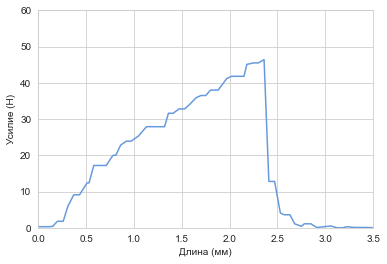

In [6]:
df_plot = df
# df_plot = df_filtered

with sb.axes_style('whitegrid'):
    ax = sb.lineplot(data=df_plot.loc[(df_plot['measure'] == 369)], x='L(mm)', y='F(N)', hue='measure', palette=dark_pal)
    ax.set(
        xlim=xlim,
        ylim=ylim,
        xlabel='Длина (мм)',
        ylabel='Усилие (Н)',
    )
    ax.legend_.remove()
    fig = ax.get_figure()
    # fig.set_figwidth(15)
    # fig.set_figheight(10)
    fig.savefig(f'sample_raw_single.png'.replace('/', '-'), dpi=300)
    # fig.clf()

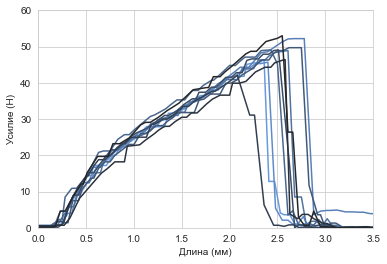

In [7]:
with sb.axes_style('whitegrid'):
    ax = sb.lineplot(data=df_plot, x='L(mm)', y='F(N)', hue='measure', palette=dark_pal)
    ax.set(
        xlim=xlim,
        ylim=ylim,
        xlabel='Длина (мм)',
        ylabel='Усилие (Н)',
    )
    ax.legend_.remove()
    fig = ax.get_figure()
    # fig.set_figwidth(15)
    # fig.set_figheight(10)
    fig.savefig(f'sample_raw_all.png'.replace('/', '-'), dpi=300)
    # fig.clf()

In [8]:
fs = []
for m in range(369, 379):
    fs.append(df.loc[df['measure'] == m]['F(N)'].tolist())

means = []
for row in zip(*fs):
    means.append(mean(row))

xs = df.loc[df['measure'] == 375]['L(mm)'].tolist()[:-10]
df_means = pd.DataFrame({'L(mm)': xs, 'F(N)': means})
df_means.head()

,L(mm),F(N)
0,0.00,0.28
1,0.05,0.27
2,0.08,0.27
3,0.15,0.35
4,0.20,1.52


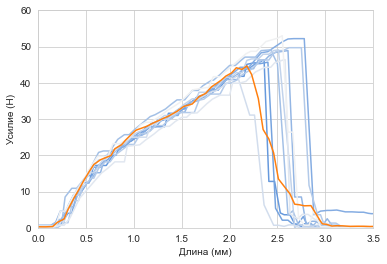

In [9]:
with sb.axes_style('whitegrid'):
    ax = sb.lineplot(data=df_plot, x='L(mm)', y='F(N)', hue='measure', palette=light_pal)
    ax = sb.lineplot(data=df_means, x='L(mm)', y='F(N)', palette=dark_pal)
    ax.set(
        xlim=xlim,
        ylim=ylim,
        xlabel='Длина (мм)',
        ylabel='Усилие (Н)',
    )
    ax.legend_.remove()
    fig = ax.get_figure()
    # fig.set_figwidth(15)
    # fig.set_figheight(10)
    fig.savefig(f'sample_mean_all.png'.replace('/', '-'), dpi=300)
    # fig.clf()


C:\Users\ipx\AppData\Local\Temp/ipykernel_21040/4000914235.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['med'] = tmp['F(N)'].rolling(3).median()


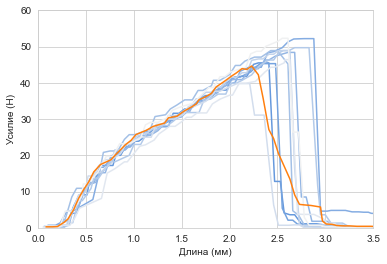

In [10]:
df_median = pd.DataFrame()

fs = []
for meas in range(369, 379):
    tmp = df.loc[df['measure'] == meas]
    tmp['med'] = tmp['F(N)'].rolling(3).median()
    df_median = pd.concat([df_median, tmp])

    fs.append(tmp['med'].tolist())

means = []
for row in zip(*fs):
    means.append(mean(row))

xs = df_median.loc[df_median['measure'] == 375]['L(mm)'].tolist()[:-10]
df_median_means =  pd.DataFrame({'L(mm)': xs, 'means': means})

with sb.axes_style('whitegrid'):
    ax = sb.lineplot(data=df_median, x='L(mm)', y='med', hue='measure', palette=light_pal)
    ax = sb.lineplot(data=df_median_means, x='L(mm)', y='means', palette=dark_pal)
    ax.set(
        xlim=xlim,
        ylim=ylim,
        xlabel='Длина (мм)',
        ylabel='Усилие (Н)',
    )
    ax.legend_.remove()
    fig = ax.get_figure()
    # fig.set_figwidth(15)
    # fig.set_figheight(10)
    fig.savefig(f'sample_median_filter.png'.replace('/', '-'), dpi=300)
    # fig.clf()


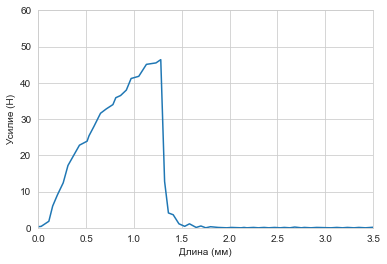

In [11]:
df_naive_filter = df.loc[df['measure'] == 369]
xs = df_naive_filter['L(mm)']
ys = df_naive_filter['F(N)']
derivs = df_naive_filter['deriv']

res = []
for y, d in zip(ys, derivs):
    if d == 0:
        continue
    res.append(y)

x_res = []
y_res = []
for x, y in zip(xs, res):
    x_res.append(x)
    y_res.append(y)

df_naive_filter = pd.DataFrame({'L(mm)': x_res, 'F(N)': y_res})

with sb.axes_style('whitegrid'):
    ax = sb.lineplot(data=df_naive_filter, x='L(mm)', y='F(N)', palette=dark_pal)
    ax.set(
        xlim=xlim,
        ylim=ylim,
        xlabel='Длина (мм)',
        ylabel='Усилие (Н)',
    )
    fig = ax.get_figure()
    # fig.set_figwidth(15)
    # fig.set_figheight(10)
    fig.savefig(f'sample_naive_filter.png'.replace('/', '-'), dpi=300)
    # fig.clf()

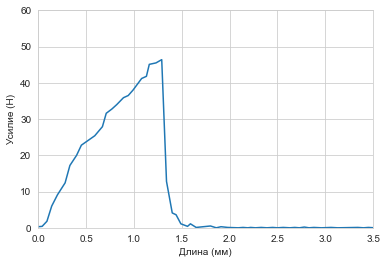

In [12]:
df_correct_filter = df.loc[df['measure'] == 369]
fs = df_correct_filter['F(N)'].values.tolist()
ls = df_correct_filter['L(mm)'].values.tolist()
ds = df_correct_filter['deriv'].values.tolist()
measure = df_correct_filter['measure'][0]
batch = df_correct_filter['batch'][0]
tmp = []

prev = ls[0]
remove_indexes = set()
for i, (f, d) in enumerate(zip(fs, ds)):
    if d == 0:
        delta = ls[i] - prev
        for j in range(i, len(ls)):
            ls[j] -= delta
        remove_indexes.add(i)
        continue
    tmp.append([f, d])
    prev = ls[i]
ls = [el for i, el in enumerate(ls) if i not in remove_indexes]

res = [[l, *r] for l, r in zip(ls, tmp)]
df_correct_filter = pd.DataFrame(res, columns=['L(mm)', 'F(N)', 'deriv'])
# df_correct_filter['batch'] = batch
# df_correct_filter['measure'] = measure

with sb.axes_style('whitegrid'):
    ax = sb.lineplot(data=df_correct_filter, x='L(mm)', y='F(N)', palette=dark_pal)
    ax.set(
        xlim=xlim,
        ylim=ylim,
        xlabel='Длина (мм)',
        ylabel='Усилие (Н)',
    )
    fig = ax.get_figure()
    # fig.set_figwidth(15)
    # fig.set_figheight(10)
    fig.savefig(f'sample_correct_filter.png'.replace('/', '-'), dpi=300)
    # fig.clf()

In [13]:
def correct_filter(df):
    fs = df['F(N)'].values.tolist()
    ls = df['L(mm)'].values.tolist()
    ds = df['deriv'].values.tolist()
    tmp = []

    prev = ls[0]
    remove_indexes = set()
    for i, (f, d) in enumerate(zip(fs, ds)):
        if d == 0:
            delta = ls[i] - prev
            for j in range(i, len(ls)):
                ls[j] -= delta
            remove_indexes.add(i)
            continue
        tmp.append([f, d])
        prev = ls[i]
    ls = [el for i, el in enumerate(ls) if i not in remove_indexes]

    res = [[l, *r] for l, r in zip(ls, tmp)]
    return pd.DataFrame(res, columns=['L(mm)', 'F(N)', 'deriv'])


In [14]:
df_correct = pd.DataFrame()

for meas in range(369, 379):
# for meas in range(372, 373):
    tmp = df.loc[df['measure'] == meas]
    tmp = correct_filter(tmp)
    tmp['measure'] = meas
    df_correct = pd.concat([df_correct, tmp])

df_correct.reset_index(inplace=True)
df_correct.head()

,index,L(mm),F(N),deriv,measure
0,0,0.00,0.3,,369
1,1,0.04,0.4,2.5,369
2,2,0.09,1.8,28.0,369
3,3,0.14,6.0,84.0,369
4,4,0.20,9.1,51.666667,369


C:\Users\ipx\AppData\Local\Temp/ipykernel_21040/903576114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['med'] = tmp['F(N)'].rolling(3).median()


113 113


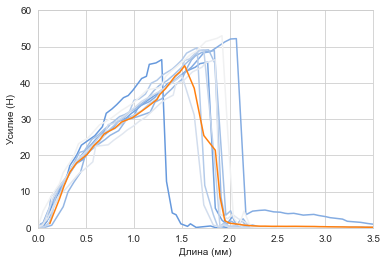

In [29]:
df_correct_means = pd.DataFrame()

fs = []
for meas in range(369, 379):
    tmp = df_correct.loc[df_correct['measure'] == meas]
    tmp['med'] = tmp['F(N)'].rolling(3).median()
    df_correct_means = pd.concat([df_correct_means, tmp])

    fs.append(tmp['med'].tolist())

means = []
for row in zip(*fs):
    means.append(mean(row))

xs = df_correct_means.loc[df_correct_means['measure'] == 375]['L(mm)'].tolist()[:-53]
print(len(xs), len(means))

df_correct_median_means = pd.DataFrame({'L(mm)': xs, 'means': means})

with sb.axes_style('whitegrid'):
    ax = sb.lineplot(data=df_correct, x='L(mm)', y='F(N)', hue='measure', palette=light_pal)
    ax = sb.lineplot(data=df_correct_median_means, x='L(mm)', y='means', palette=dark_pal)
    ax.set(
        xlim=xlim,
        ylim=ylim,
        xlabel='Длина (мм)',
        ylabel='Усилие (Н)',
    )
    ax.legend_.remove()
    fig = ax.get_figure()
    # fig.set_figwidth(15)
    # fig.set_figheight(10)
    fig.savefig(f'sample_median_correct_filter.png'.replace('/', '-'), dpi=300)
    # fig.clf()


In [16]:

# with sb.axes_style('whitegrid'):
#     ax = sb.lineplot(data=df_correct, x='L(mm)', y='F(N)', hue='measure', palette=light_pal)
#     # ax = sb.lineplot(data=df_median_means, x='L(mm)', y='means', palette=dark_pal)
#     ax.set(
#         xlim=xlim,
#         ylim=ylim,
#         xlabel='Длина (мм)',
#         ylabel='Усилие (Н)',
#     )
#     ax.legend_.remove()
#     fig = ax.get_figure()
#     # fig.set_figwidth(15)
#     # fig.set_figheight(10)
#     fig.savefig(f'sample_correct_filter_with_mean.png'.replace('/', '-'), dpi=300)
#     # fig.clf()